<a href="https://colab.research.google.com/github/Mahnoor123-Fatima/Chest_X-RAY_Classifier/blob/main/Chest_X_ray_Classifier_assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahnoorfatima123","key":"38079f0483a9b4ab2c2c83d8daa5bdb7"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                               title                                                 size  lastUpdated          downloadCount  
----------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  
christianlillelund/donald-trumps-rallies                          Donald Trump's Rallies                               720KB  2020-09-26 10:25:08            644  
heeraldedhia/groceries-dataset                                    Groceries dataset                                    257KB  2020-09-17 04:36:08           3102  
andrewmvd/trip-advisor-hotel-reviews                              Trip Advisor Hotel Reviews                             5MB  2020-09-30 08:31:20           1765  
balraj98/stanford-background-dataset                              Stanford Background Dataset                           17MB  2020-09-26 12:57:59            186  
nehaprabhavalkar/india

In [ ]:
!kaggle datasets download paultimothymooney/Chest-xray-pneumonia

100% 2.29G/2.29G [00:30<00:00, 16.5MB/s]
100% 2.29G/2.29G [00:30<00:00, 80.6MB/s]


In [ ]:
! mkdir data

In [ ]:
! unzip /content/Chest-xray-pneumonia.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: data/chest_xray/train/NORMAL/IM-0447-0001.jpeg  

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
normal_chestimage = cv2.imread('/content/data/chest_xray/train/NORMAL/IM-0122-0001.jpeg')

In [ ]:
normal_chestimage.shape

(1279, 1618, 3)

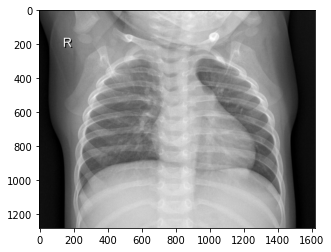

In [ ]:
plt.imshow(normal_chestimage)

In [ ]:
normal_chestimage = cv2.cvtColor(normal_chestimage, cv2.COLOR_BGR2RGB)

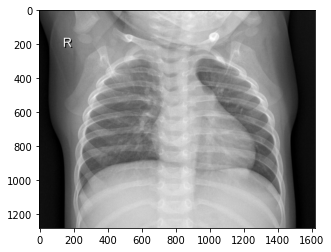

In [ ]:
plt.imshow(normal_chestimage)

In [ ]:
pnemounia_chestimage = cv2.imread('/content/data/chest_xray/train/PNEUMONIA/person1002_bacteria_2933.jpeg')

In [ ]:
pnemounia_chestimage.shape

(940, 1242, 3)

In [ ]:
pnemounia_chestimage = cv2.cvtColor(pnemounia_chestimage, cv2.COLOR_BGR2RGB)

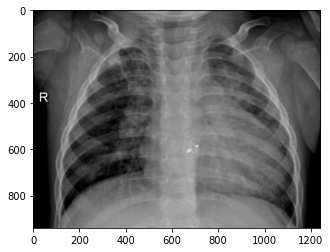

In [ ]:
plt.imshow(pnemounia_chestimage)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#formation of image_data_generator
image_gen = ImageDataGenerator(rotation_range = 30, width_shift_range=0.1, 
                               height_shift_range=0.1,
                               rescale=1/255, shear_range=0.2, zoom_range=0.2, 
                               horizontal_flip=True, fill_mode='nearest')

done


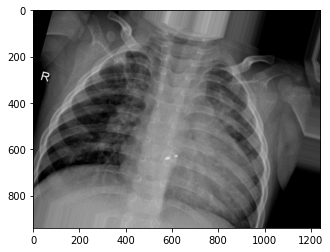

In [ ]:
plt.imshow(image_gen.random_transform(pnemounia_chestimage))
print('done')  

In [ ]:
#now apply image data generators on all images of dataset:
image_gen.flow_from_directory('/content/data/chest_xray/train')

Found 5216 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory('/content/data/chest_xray/test')

Found 624 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory('/content/data/chest_xray/val')

Found 16 images belonging to 2 classes.


In [ ]:
input_shape = (150,150,3)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout 

In [ ]:
model = Sequential()

#conv block 1
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#conv block 2
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#conv block 3
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))  
model.add(Activation('sigmoid')) 

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [ ]:
input_shape[:2]

(150, 150)

In [ ]:
batch_size = 16

train_gen = image_gen.flow_from_directory('/content/data/chest_xray/train',target_size=input_shape[:2],
                                          batch_size=batch_size,class_mode='binary')

Found 5216 images belonging to 2 classes.


In [ ]:
batch_size = 16

test_gen = image_gen.flow_from_directory('/content/data/chest_xray/test',target_size=input_shape[:2],
                                          batch_size=batch_size,class_mode='binary')

Found 624 images belonging to 2 classes.


In [ ]:
batch_size = 16

val_gen = image_gen.flow_from_directory('/content/data/chest_xray/val',target_size=input_shape[:2],
                                          batch_size=batch_size,class_mode='binary')

Found 16 images belonging to 2 classes.


In [ ]:
train_gen.class_indices 

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
results = model.fit_generator(train_gen,epochs=10,steps_per_epoch=100,validation_data=test_gen,validation_steps=12) 

Epoch 1/10
100/100 [==============================] - 28s 284ms/step - loss: 0.6006 - accuracy: 0.7362 - val_loss: 0.6607 - val_accuracy: 0.6250
Epoch 2/10
100/100 [==============================] - 29s 287ms/step - loss: 0.4739 - accuracy: 0.7756 - val_loss: 0.6570 - val_accuracy: 0.6615
Epoch 3/10
100/100 [==============================] - 30s 297ms/step - loss: 0.4119 - accuracy: 0.8037 - val_loss: 0.6290 - val_accuracy: 0.6875
Epoch 4/10
100/100 [==============================] - 28s 277ms/step - loss: 0.3911 - accuracy: 0.8331 - val_loss: 0.6238 - val_accuracy: 0.7083
Epoch 5/10
100/100 [==============================] - 28s 279ms/step - loss: 0.3243 - accuracy: 0.8625 - val_loss: 0.7667 - val_accuracy: 0.7240
Epoch 6/10
100/100 [==============================] - 28s 279ms/step - loss: 0.2873 - accuracy: 0.8706 - val_loss: 0.6577 - val_accuracy: 0.7552
Epoch 7/10
100/100 [==============================] - 28s 283ms/step - loss: 0.3102 - accuracy: 0.8687 - val_loss: 0.3439 - val_ac

In [ ]:
print(results.history['accuracy'])

[0.7362499833106995, 0.7756249904632568, 0.8037499785423279, 0.8331249952316284, 0.862500011920929, 0.8706250190734863, 0.8687499761581421, 0.871874988079071, 0.8831250071525574, 0.8818749785423279]


In [ ]:
print(results.history['loss']) 

[0.6005740761756897, 0.47392764687538147, 0.41193291544914246, 0.3911016583442688, 0.32432156801223755, 0.28728795051574707, 0.31022387742996216, 0.29159972071647644, 0.2793647348880768, 0.2643924951553345]


In [ ]:
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


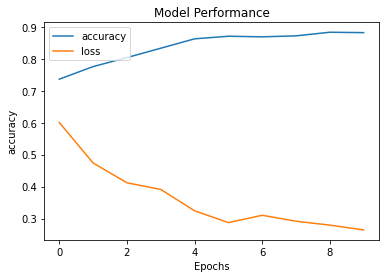

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['loss'])
plt.title('Model Performance')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['accuracy','loss'],loc='upper left')
plt.show()

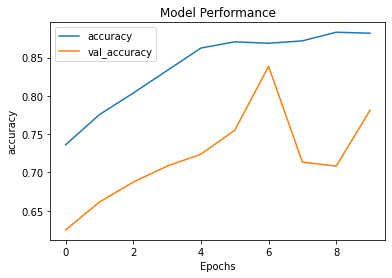

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model Performance')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['accuracy','val_accuracy'],loc='upper left')
plt.show()

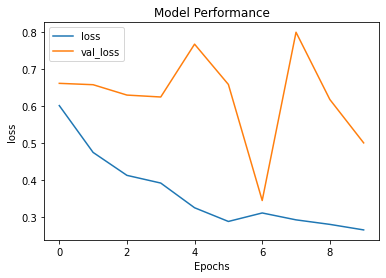

In [ ]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.legend(['loss','val_loss'],loc='upper left')
plt.show()

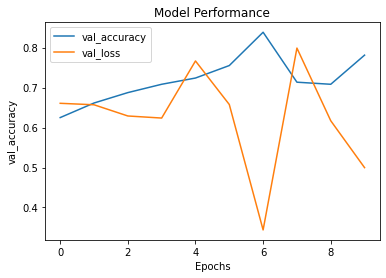

In [ ]:
plt.plot(results.history['val_accuracy'])
plt.plot(results.history['val_loss'])
plt.title('Model Performance')
plt.ylabel('val_accuracy')
plt.xlabel('Epochs')
plt.legend(['val_accuracy','val_loss'],loc='upper left')
plt.show()

In [ ]:
# here we start to predict image

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
effected_chest_img = image.load_img('/content/data/chest_xray/train/PNEUMONIA/person1003_virus_1685.jpeg',target_size=(150,150))

effected_chest_img = image.img_to_array(effected_chest_img)
print(effected_chest_img.shape)
effected_chest_img = np.expand_dims(effected_chest_img,axis=0)  
print(effected_chest_img.shape)
effected_chest_img=effected_chest_img/255

(150, 150, 3)
(1, 150, 150, 3)


In [ ]:
prediction = model.predict(effected_chest_img)

In [ ]:
print(f'probability of that image to be a pnemounia effected is:{prediction}')

probability of that image to be a pnemounia effected is:[[0.9695152]]


In [ ]:
resulted_img = model.predict_classes(effected_chest_img)
print(resulted_img)

[[1]]
